In [8]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from google.colab import drive

In [104]:
drive.mount('/content/drive', force_remount=True)
dataset=pd.read_excel("/content/drive/MyDrive/Credit_scoring/Data_CreditScoring.xlsx") #Data_CreditScoring
dataset.head()

Mounted at /content/drive


,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [105]:
dataset=dataset.drop('ID',axis=1)

In [106]:
dataset=dataset.fillna(dataset.mean())
y = np.array(dataset['TARGET'])
X = dataset.iloc[:, 1:29].values

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15,random_state=0,stratify=y)

In [108]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [110]:
import joblib
joblib.dump(sc, "/content/drive/MyDrive/Credit_scoring/Data_CreditScoring_SC.joblib")

['/content/drive/MyDrive/Credit_scoring/Data_CreditScoring_SC.joblib']

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [112]:
joblib.dump(classifier, '/content/drive/MyDrive/Credit_scoring/Data_CreditScoring_GradientBoosting.joblib')

['/content/drive/MyDrive/Credit_scoring/Data_CreditScoring_GradientBoosting.joblib']

Accuracy:  82.88888888888889 %
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       375
           1       0.46      0.17      0.25        75

    accuracy                           0.83       450
   macro avg       0.66      0.57      0.58       450
weighted avg       0.79      0.83      0.79       450



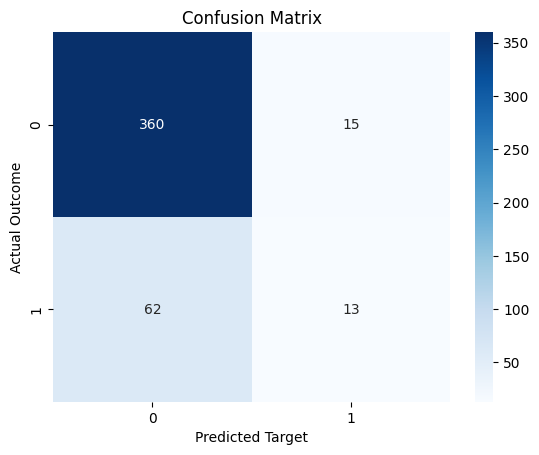

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


matrix = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)

print("Accuracy: ", score * 100, "%")
report = classification_report(y_test, y_pred)
print(report)


con = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(con, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
ax.xaxis.set_ticklabels(["0", "1"])
ax.yaxis.set_ticklabels(["0", "1"])
plt.xlabel("Predicted Target")
plt.ylabel("Actual Outcome")
plt.show()


In [116]:
predictions = classifier.predict_proba(X_test)

In [117]:
#df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
df_prediction_target = pd.DataFrame(y_pred, columns = ['predicted_TARGET'])
df_test_dataset = pd.DataFrame(y_test,columns= ['Actual Outcome'])
dfx=pd.concat([df_test_dataset, df_prediction_target], axis=1)
#dfx=pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)
dfx.to_csv("/content/drive/MyDrive/Credit_scoring/CreditScore_Predictions_GradientBoosting.xlsx", sep=',', encoding='UTF-8')
